In [69]:
# Python
import pandas as pd
from prophet import Prophet

In [70]:
df = pd.read_csv('./CSV/df_btc.csv')
df.head()

,Date,Close,High,Low,Open,Volume
0,2020-02-12,10326.054688,10393.611328,10202.387695,10202.387695,43444303830
1,2020-02-13,10214.379883,10457.626953,10116.161133,10323.960938,49356071373
2,2020-02-14,10312.116211,10321.996094,10125.534180,10211.550781,43338264162
3,2020-02-15,9889.424805,10341.555664,9874.427734,10313.856445,43865054831
4,2020-02-16,9934.433594,10053.968750,9722.386719,9889.179688,43374780305


In [71]:
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True) #renaming for prophet
df.head()

,ds,y,High,Low,Open,Volume
0,2020-02-12,10326.054688,10393.611328,10202.387695,10202.387695,43444303830
1,2020-02-13,10214.379883,10457.626953,10116.161133,10323.960938,49356071373
2,2020-02-14,10312.116211,10321.996094,10125.534180,10211.550781,43338264162
3,2020-02-15,9889.424805,10341.555664,9874.427734,10313.856445,43865054831
4,2020-02-16,9934.433594,10053.968750,9722.386719,9889.179688,43374780305


In [72]:
# Fit the model
m = Prophet()
m.fit(df)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

18:27:34 - cmdstanpy - INFO - Chain [1] start processing
18:27:35 - cmdstanpy - INFO - Chain [1] done processing


,ds
2188,2026-02-08
2189,2026-02-09
2190,2026-02-10
2191,2026-02-11
2192,2026-02-12


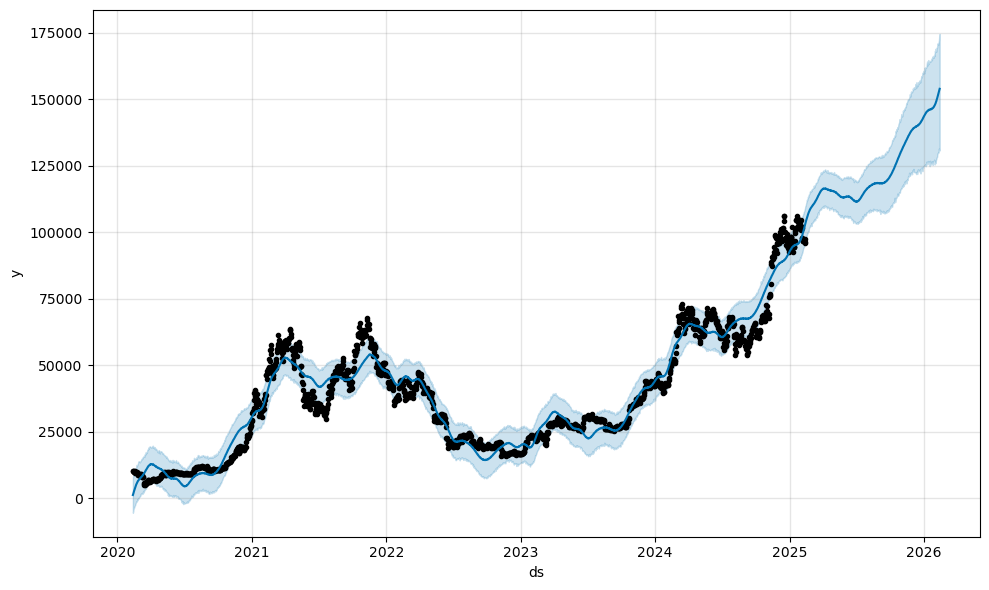

In [73]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# Python
fig1 = m.plot(forecast)





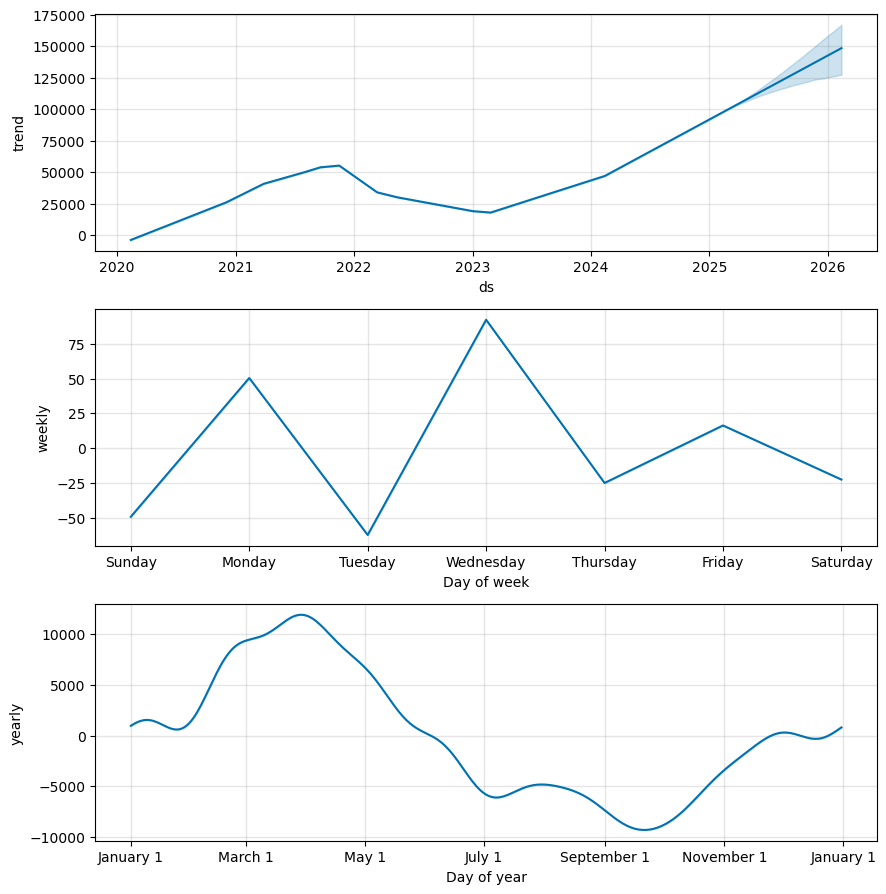

In [74]:
# Python
fig2 = m.plot_components(forecast)



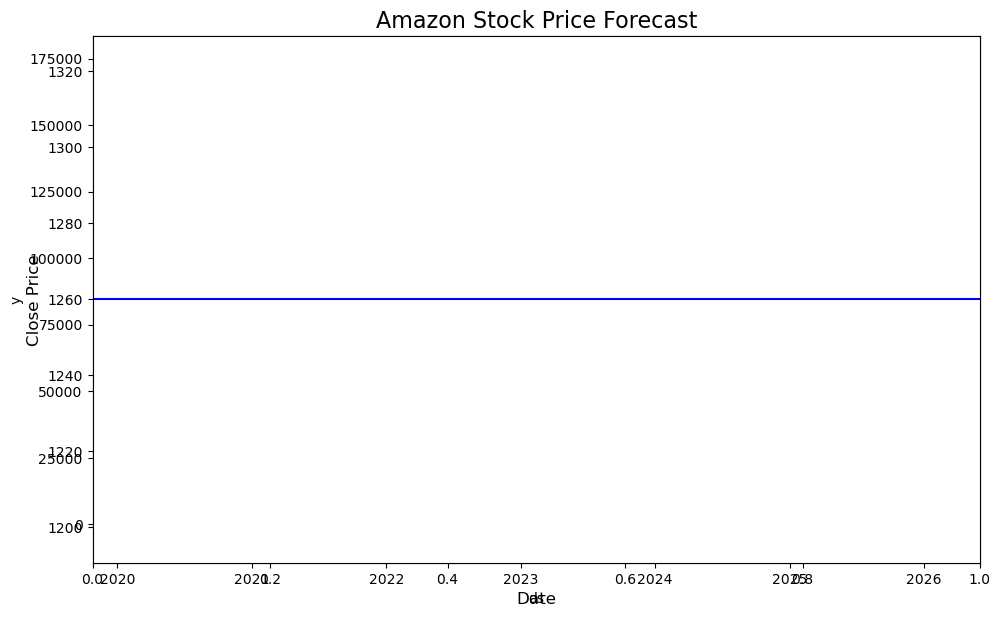

In [75]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt


# Dates
starting_date = dt.datetime(2018, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Amazon Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1350), xytext=(starting_date1,1700),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 1225), xytext=(trend_date1,950),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=1260, color='b', linestyle='-')

plt.show()

In [76]:
# Add imports
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# After the forecast is generated, add candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['ds'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['y'])])

fig.update_layout(title='BTC Price History',
                 yaxis_title='Price',
                 xaxis_title='Date')
fig.show()

# Add performance metrics
# Calculate errors on the training data
y_true = df['y'].values
y_pred = forecast['yhat'][:len(y_true)]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"""Model Performance Metrics:
MAE: ${mae:.2f}
RMSE: ${rmse:.2f}
MAPE: {mape:.2f}%""")

# Cross-validation
from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
print("\nCross Validation Metrics:")
print(df_p[['horizon', 'mae', 'rmse', 'mape']].tail())

Model Performance Metrics:
MAE: $4032.09
RMSE: $5089.99
MAPE: 14.42%


  0%|          | 0/5 [00:00<?, ?it/s]

18:27:36 - cmdstanpy - INFO - Chain [1] start processing
18:27:36 - cmdstanpy - INFO - Chain [1] done processing
18:27:37 - cmdstanpy - INFO - Chain [1] start processing
18:27:37 - cmdstanpy - INFO - Chain [1] done processing
18:27:37 - cmdstanpy - INFO - Chain [1] start processing
18:27:37 - cmdstanpy - INFO - Chain [1] done processing
18:27:37 - cmdstanpy - INFO - Chain [1] start processing
18:27:38 - cmdstanpy - INFO - Chain [1] done processing
18:27:38 - cmdstanpy - INFO - Chain [1] start processing
18:27:38 - cmdstanpy - INFO - Chain [1] done processing



Cross Validation Metrics:
     horizon           mae          rmse      mape
324 361 days  25272.776024  27838.804756  0.632376
325 362 days  25203.739754  27761.186247  0.631420
326 363 days  25117.198978  27683.576858  0.630019
327 364 days  25002.884401  27592.814703  0.628138
328 365 days  24913.817020  27525.604916  0.626423


In [81]:
# Import required libraries
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Load the Bitcoin data
df = pd.read_csv('./CSV/df_btc.csv')

# Convert to datetime and rename columns
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

# Split data into train and test (80-20 split)
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Model Configuration
m = Prophet(
    changepoint_prior_scale=0.15,  # Augmentation de la flexibilité des changepoints
    seasonality_mode='multiplicative',  # Mode saisonnier multiplicatif
    yearly_seasonality=20,           # Fourier terms pour la saisonnalité annuelle
    weekly_seasonality=15,           # Fourier terms pour la saisonnalité hebdomadaire
    daily_seasonality=False,         # Désactivé pour les données quotidiennes
    n_changepoints=200               # Augmentation du nombre de points de changement
)

# Add seasonalities
m.add_seasonality(name='monthly', period=30.5, fourier_order=10)

# Model Training
m.fit(train)

# Cross-validation
df_cv = cross_validation(
    m,
    initial='730 days',  # Période d'entraînement initiale (2 ans)
    period='180 days',   # Période entre les splits (6 mois)
    horizon='90 days'    # Période de prévision (3 mois)
)

# Calculate performance metrics
df_p = performance_metrics(df_cv)

# Display performance metrics
print("\nPerformance Metrics:")
print(df_p[['horizon', 'mae', 'rmse', 'mape']].tail())

# Calculate average metrics
average_mae = df_p['mae'].mean()
average_rmse = df_p['rmse'].mean()
average_mape = df_p['mape'].mean() * 100

print(f"\nAverage Metrics:")
print(f"MAE: {average_mae:.2f}")
print(f"RMSE: {average_rmse:.2f}")
print(f"MAPE: {average_mape:.2f}%")

# Final forecast with full data
m_full = Prophet(
    changepoint_prior_scale=0.15,
    seasonality_mode='multiplicative',
    yearly_seasonality=20,
    weekly_seasonality=15,
    daily_seasonality=False,
    n_changepoints=200
).fit(df)

future = m_full.make_future_dataframe(periods=365)
forecast = m_full.predict(future)

# Plotting
fig = go.Figure()

# Actual data
fig.add_trace(go.Scatter(
    x=df['ds'], 
    y=df['y'], 
    mode='lines', 
    name='Historical Data',
    line=dict(color='#1f77b4')
))

# Forecast
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y=forecast['yhat'], 
    mode='lines', 
    name='Forecast',
    line=dict(color='#ff7f0e')))
    
# Uncertainty interval
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_upper'],
    fill=None,
    mode='lines',
    line=dict(color='rgba(255,127,14,0.1)'),
    name='Upper Bound'))

fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_lower'],
    fill='tonexty',
    mode='lines',
    line=dict(color='rgba(255,127,14,0.1)'),
    name='Lower Bound'))

# Test data comparison
fig.add_trace(go.Scatter(
    x=test['ds'], 
    y=test['y'], 
    mode='markers', 
    name='Test Data',
    marker=dict(color='#2ca02c', size=4)))
    
fig.update_layout(
    title='Bitcoin Price Forecast with Uncertainty',
    xaxis_title='Date',
    yaxis_title='Price',
    hovermode='x unified',
    showlegend=True
)

fig.show()

19:13:01 - cmdstanpy - INFO - Chain [1] start processing
19:13:05 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

19:13:05 - cmdstanpy - INFO - Chain [1] start processing
19:13:07 - cmdstanpy - INFO - Chain [1] done processing
19:13:07 - cmdstanpy - INFO - Chain [1] start processing
19:13:09 - cmdstanpy - INFO - Chain [1] done processing
19:13:09 - cmdstanpy - INFO - Chain [1] start processing
19:13:12 - cmdstanpy - INFO - Chain [1] done processing
19:13:12 - cmdstanpy - INFO - Chain [1] start processing
19:13:15 - cmdstanpy - INFO - Chain [1] done processing
19:13:15 - cmdstanpy - INFO - Chain [1] start processing



Performance Metrics:
   horizon           mae          rmse      mape
77 86 days  10475.445521  12104.726246  0.391587
78 87 days  10670.683475  12285.486068  0.397345
79 88 days  10994.113883  12630.137188  0.408499
80 89 days  11284.063490  12931.137111  0.419250
81 90 days  11659.701845  13361.446632  0.431060

Average Metrics:
MAE: 7239.69
RMSE: 8123.11
MAPE: 28.00%


19:13:19 - cmdstanpy - INFO - Chain [1] done processing
